In [1]:
import pandas as pd
import os
import sys


In [2]:
pwd

'C:\\Users\\Khamir\\Dropbox\\Data Science Projects\\COVID-19-Diagnosis'

In [3]:
PATH = 'C:\\Users\\Khamir\\Dropbox\\Data Science Projects\\COVID-19-Diagnosis\\data\\'

In [4]:
df_1 = pd.read_csv(PATH + '04-07_carbonhealth_and_braidhealth.csv')
df_2 = pd.read_csv(PATH + '04-14_carbonhealth_and_braidhealth.csv')
df_3 = pd.read_csv(PATH + '04-21_carbonhealth_and_braidhealth.csv')
df = pd.concat([df_1,df_2, df_3], )

In [5]:
df = df.reset_index().drop('index', axis=1)

In [8]:
df.describe()

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,1611.000000,1534.000000,1512.000000,1514.000000,1514.000000,1272.000000,1494.000000,811.000000
mean,40.622595,36.939733,83.521825,127.054161,80.212682,15.548742,97.931058,8.381011
std,15.190888,0.367087,14.793466,16.395911,9.969800,2.140791,1.493433,12.519874
min,0.000000,35.650000,48.000000,81.000000,43.000000,11.000000,91.000000,1.000000
25%,30.000000,36.750000,73.000000,116.000000,74.000000,14.000000,97.000000,3.000000
50%,38.000000,36.900000,82.000000,126.000000,80.000000,16.000000,98.000000,5.000000
75%,50.000000,37.100000,93.250000,137.000000,86.000000,17.000000,99.000000,7.000000
max,90.000000,39.350000,165.000000,205.000000,135.000000,28.000000,100.000000,150.000000


In [57]:
df_pos = df[df['covid19_test_results'] == 'Positive']

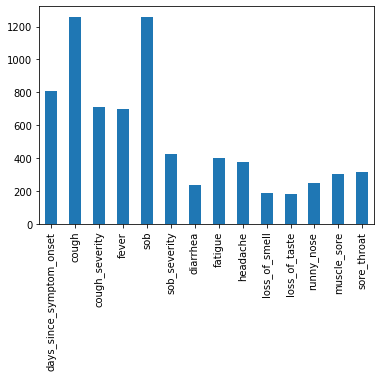

In [89]:
df[symptom_cols].count().plot.bar()

In [76]:
for col in symptom_cols:
    print(df_pos[col].value_counts())    


3.0     14
7.0     11
5.0      8
2.0      7
4.0      5
14.0     4
1.0      3
21.0     1
28.0     1
10.0     1
Name: days_since_symptom_onset, dtype: int64
True     54
False    30
Name: cough, dtype: int64
Mild        29
Moderate    23
Name: cough_severity, dtype: int64
True     27
False    16
Name: fever, dtype: int64
False    66
True     18
Name: sob, dtype: int64
Moderate    9
Mild        8
Name: sob_severity, dtype: int64
False    10
True      3
Name: diarrhea, dtype: int64
True     16
False     9
Name: fatigue, dtype: int64
True     19
False    10
Name: headache, dtype: int64
True     12
False    10
Name: loss_of_smell, dtype: int64
False    10
True      9
Name: loss_of_taste, dtype: int64
False    10
True      6
Name: runny_nose, dtype: int64
True     17
False    10
Name: muscle_sore, dtype: int64
False    10
True      8
Name: sore_throat, dtype: int64


In [74]:
df_pos.cough.value_counts()

True     54
False    30
Name: cough, dtype: int64

In [64]:
symptom_cols = ['days_since_symptom_onset',
                'cough',
                'cough_severity',
                'fever',
                'sob',
                'sob_severity',
                'diarrhea',
                'fatigue',
                'headache',
                'loss_of_smell',
                'loss_of_taste',
                'runny_nose',
                'muscle_sore',
                'sore_throat'
               ]

In [66]:
for col in symptom_cols:
    print(col)
    print(df_pos[col].isna().sum())

days_since_symptom_onset
46
cough
17
cough_severity
49
fever
58
sob
17
sob_severity
84
diarrhea
88
fatigue
76
headache
72
loss_of_smell
79
loss_of_taste
82
runny_nose
85
muscle_sore
74
sore_throat
83


In [67]:
for col in df.columns:
    print(col)
    print(df_pos[col].isna().sum())

date_published
0
clinic_state
0
test_name
0
swab_type
0
covid19_test_results
0
age
0
high_risk_exposure_occupation
21
high_risk_interactions
50
diabetes
0
chd
0
htn
0
cancer
0
asthma
0
copd
0
autoimmune_dis
0
temperature
6
pulse
3
sys
6
dia
6
rr
29
sats
5
rapid_flu_results
91
rapid_strep_results
99
days_since_symptom_onset
46
ctab
8
labored_respiration
5
rhonchi
14
wheezes
14
cough
17
cough_severity
49
fever
58
sob
17
sob_severity
84
diarrhea
88
fatigue
76
headache
72
loss_of_smell
79
loss_of_taste
82
runny_nose
85
muscle_sore
74
sore_throat
83
cxr_findings
87
cxr_impression
87
cxr_link
87
er_referral
0


In [68]:
df.dropna(axis=1)

,date_published,clinic_state,test_name,swab_type,covid19_test_results,age,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,er_referral
0,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,36,False,False,False,False,False,False,False,False
1,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,35,False,False,False,False,False,False,False,False
2,2020-04-07,CA,SARS COV 2 RNA RTPCR,Oropharyngeal,Negative,18,False,False,False,False,False,False,False,False
3,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,46,False,False,False,False,False,False,False,False
4,2020-04-07,CA,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,29,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,69,False,False,False,False,False,False,False,False
1607,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,48,False,False,False,False,False,False,False,False
1608,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,31,False,False,False,False,False,False,False,False
1609,2020-04-21,CA,Rapid COVID-19 Test,Nasal,Negative,30,False,False,True,False,False,False,False,False


In [38]:
df.covid19_test_results.value_counts()

Negative    1509
Positive     101
Other          1
Name: covid19_test_results, dtype: int64

In [42]:
df.isnull()

,date_published,clinic_state,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_link,er_referral
0,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1607,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,True,True,False
1608,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,False
1609,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,True,True,True,False
